## Homework 3: Qualifying Red Wine

Cassia Cai 
fmc2855@uw.edu

#### Goal: develop an algorithm that predicts the quality of wine from a series of chemical measurements
You have been hired as a data scientist by a winery in Portugal. Your task is to develop an algorithm that predicts the quality of wine from a series of chemical measurements. Your algorithm will be used by the marketing team to price a new batch of products.

You have access to a training data set wine_training.csv consisting of 1115 instances (different types of wine that were measured in the lab) and a test data set wine_test.csv with 479 instances. Each instance of the data has 11 attributes (features) that are outlined in the description file wine_description.txt. The corresponding output to each set of features is the quality of the wine on a scale of 0 to 10 provided by experts. Finally, you are given the lab measurements for a batch of five new wines in wine_new_batch.csv for which you are required to predict the qualities.

####  Description
This dataset is a subset of data set of [Cortez et al., 2009]: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

This description has been modified slightly from the original to tailor the data set to a homework assignment for AMATH 482/582 course at University of Washington. The datasets is related to variants of the Portuguese "Vinho Verde" red wine. For details, consult: http://www.vinhoverde.pt/en/.
   
Number of Instances: 1115 (training) and 479 (test) 
Number of input features: 11 (numeric)
Number of outputs: 1 (numeric)
  
Attributes information (input features/columns 1-11 in CSV files):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output (column 12 in CSV file): 
12. quality (score between 0 and 10)

In [246]:
#  ------------------ import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [248]:
#  ------------------ load data files
wine_training = np.loadtxt('wine_training.csv', delimiter=",", unpack=True) # training data
wine_test = np.loadtxt('wine_test.csv', delimiter=",", unpack=True) # test data

wine_new_batch = np.loadtxt('wine_new_batch.csv', delimiter=",", unpack=True) # new batch where we do not know labels

In [250]:
print('training data shape:   ' ,wine_training.shape)
print('test data shape:       ' ,wine_test.shape)
print('new batch data shape:  ' ,wine_new_batch.shape)

training data shape:    (12, 1115)
test data shape:        (12, 479)
new batch data shape:   (11, 5)


In [252]:
X_train = wine_training[0:11] # attributes are the first 11 columns
Y_train = wine_training[-1] # quality score is the last column

X_test = wine_test[0:11]
Y_test = wine_test[-1]

X_new = wine_new_batch[0:11]
Y_new = wine_new_batch[-1]

In [253]:
labels = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
         'sulphates','alcohol']

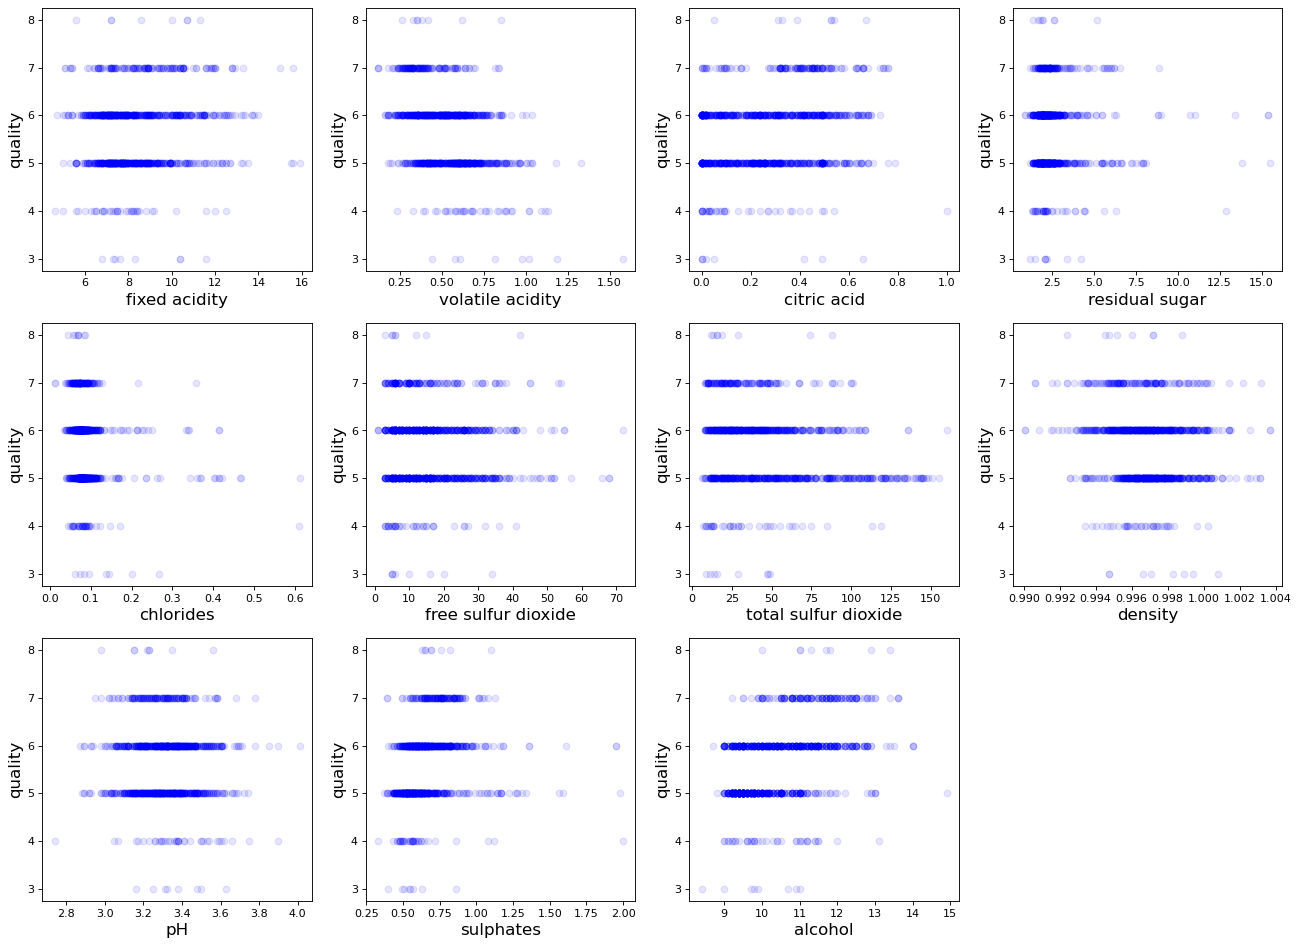

In [270]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for i in range(1,12):
    xlabel = labels[i-1]
    plt.subplot(4, 4, i)
    plt.scatter(X_train[i-1,:], Y_train,alpha=0.1, c='blue')
    plt.ylabel('quality', fontsize=15)
    plt.xlabel(str(xlabel), fontsize=15)
plt.show()

Your first step after reading in the data should be to normalize and center your input features (the 𝑥𝑗’s) as well your outputs (the 𝑦𝑗’s) so that they have mean 0 and standard deviation 1. This has a notable impact on the performance of kernel methods.

In [258]:
import numpy.matlib
# we normalize and center the training set

X_train_N = X_train.shape[1]

X_train_mean = np.mean(X_train, axis=1)
X_train_std = np.std(X_train, axis=1)

X_train_normal = (np.transpose(X_train) - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)

# -------------------------------

Y_train_N = Y_train.shape[0]

Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)

Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

X_train_normal_transp = np.transpose(X_train_normal)
Y_train_normal_transp = np.transpose(Y_train_normal)

In [259]:
print(X_train_normal.shape)
print(Y_train_normal.shape)

print(X_train_normal_transp.shape)
print(Y_train_normal_transp.shape)

(1115, 11)
(1115,)
(11, 1115)
(1115,)


In [260]:
# we normalize and center the test set
# NOTE: the shift and scaling here are those computed on the training set 
X_test_N = X_test.shape[1]

X_test_normal = (np.transpose(X_test) - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std

X_test_normal_transp = np.transpose(X_test_normal)
Y_test_normal_transp = np.transpose(Y_test_normal)

In [261]:
print(X_test_normal.shape)
print(Y_test_normal.shape)

print(X_test_normal_transp.shape)
print(Y_test_normal_transp.shape)

(479, 11)
(479,)
(11, 479)
(479,)


In [263]:
# we normalize and center the new set
# NOTE: the shift and scaling here are those computed on the training set 
X_new_N = X_new.shape[1]

X_new_normal = (np.transpose(X_new) - np.matlib.repmat(X_train_mean, X_new_N, 1))/np.matlib.repmat(X_train_std, X_new_N, 1)
Y_new_normal = (Y_new - Y_train_mean)/Y_train_std

X_new_normal_transp = np.transpose(X_new_normal)
Y_new_normal_transp = np.transpose(Y_new_normal)

In [264]:
print(X_new_normal.shape)
print(Y_new_normal.shape)
print(X_new_normal_transp.shape)
print(Y_new_normal_transp.shape)

(5, 11)
(5,)
(11, 5)
(5,)


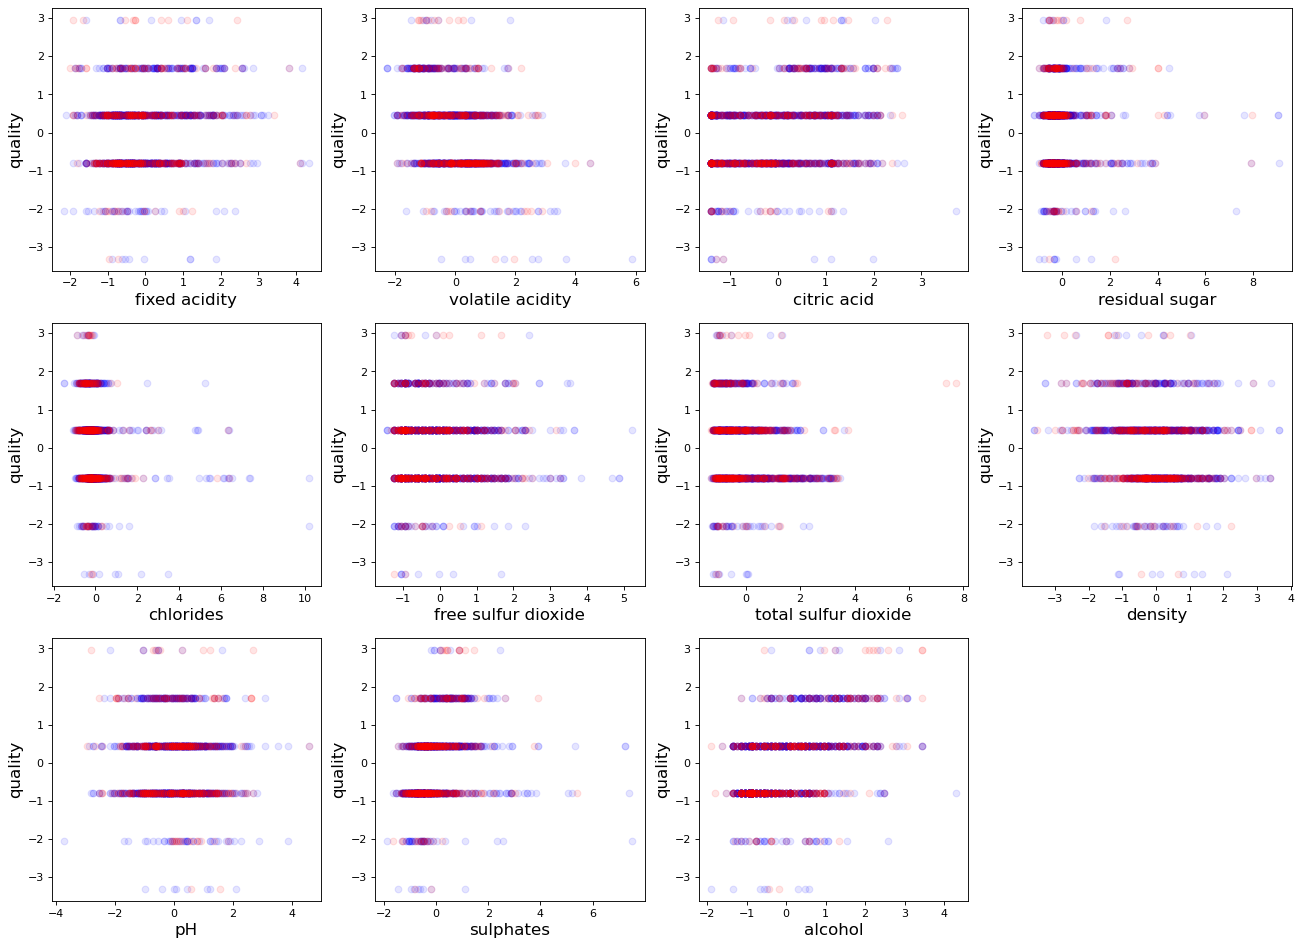

In [269]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for i in range(1,12):
    xlabel = labels[i-1]
    plt.subplot(4, 4, i)
    plt.scatter(X_train_normal_transp[i-1,:], Y_train_normal_transp,c='blue',alpha=0.1)
    plt.scatter(X_test_normal_transp[i-1,:], Y_test_normal_transp,c='red',alpha=0.1)
    plt.ylabel('quality', fontsize=15)
    plt.xlabel(str(xlabel), fontsize=15)
plt.show()

In [271]:
def calculate_MSE(predicted_array, actual_labels):
    ''' ----------------------------------------
    a function that calculates the mean squared error
    of the predicted labels and the actual labels
    -----------------------------------------'''
    MSE = (1/len(predicted_array))*np.linalg.norm(predicted_array - actual_labels)**2
    return MSE

## Linear regression

In [275]:
l = np.linspace(-15, 30, M_lambd)

lambda_vals = 2**l

reg_rndf_CV = linear_model.RidgeCV(alphas=lambda_vals)
reg_rndf_CV.fit(X_train_normal, Y_train_normal)
beta_CV = np.insert(reg_rndf_CV.coef_, 0, reg_rndf_CV.intercept_)

print("Log_2(Lambda_ast): " + str(np.log2(reg_rndf_CV.alpha_)))

Log_2(Lambda_ast): 5.204081632653061


In [277]:
reg_rndf = linear_model.Ridge(alpha=2**np.log2(reg_rndf_CV.alpha_)) # alpha is our lambda
reg = reg_rndf.fit(X_train_normal, Y_train_normal)

linear_regressor.fit(X_train_normal, Y_train_normal)  # perform linear regression
Y_pred_train = linear_regressor.predict(X_train_normal)  # make predictions
Y_pred_test = linear_regressor.predict(X_test_normal)  # make predictions

MSE_train = calculate_MSE(Y_pred_train, Y_train_normal)
MSE_test = calculate_MSE(Y_pred_test, Y_test_normal)

print(MSE_train)
print(MSE_test)

0.6278484956554883
0.7471696905187212


In [278]:
X_new_normal = (np.transpose(X_new) - np.matlib.repmat(X_train_mean, X_new_N, 1))/np.matlib.repmat(X_train_std, X_new_N, 1)
Y_new_normal = (Y_new - Y_train_mean)/Y_train_std

In [279]:
Y_new_test = linear_regressor.predict(X_new_normal)  # make predictions with new
Y_new_test_denormed = (Y_new_test*Y_train_std)+Y_train_mean
print(Y_new_test_denormed)

[6.00469789 5.28767761 5.56363072 6.067022   5.94248207]


In [281]:
#  ------------------ Use linear regression (least squares) to fit a linear model to the training set.
from sklearn.linear_model import LinearRegression

X_train_normal_transp = np.transpose(X_train_normal)

linear_regressor = LinearRegression()  # create object for the class
reg = LinearRegression().fit(X_train_normal, Y_train_normal)

linear_regressor.fit(X_train_normal, Y_train_normal)  # perform linear regression
Y_pred_train = linear_regressor.predict(X_train_normal)  # make predictions
Y_pred_test = linear_regressor.predict(X_test_normal)  # make predictions
Y_pred_new = linear_regressor.predict(X_new_normal)  # make predictions

MSE_train = calculate_MSE(Y_pred_train, Y_train_normal)
MSE_test = calculate_MSE(Y_pred_test, Y_test_normal)

print(MSE_train)
print(MSE_test)

0.6278484956554883
0.7471696905187212


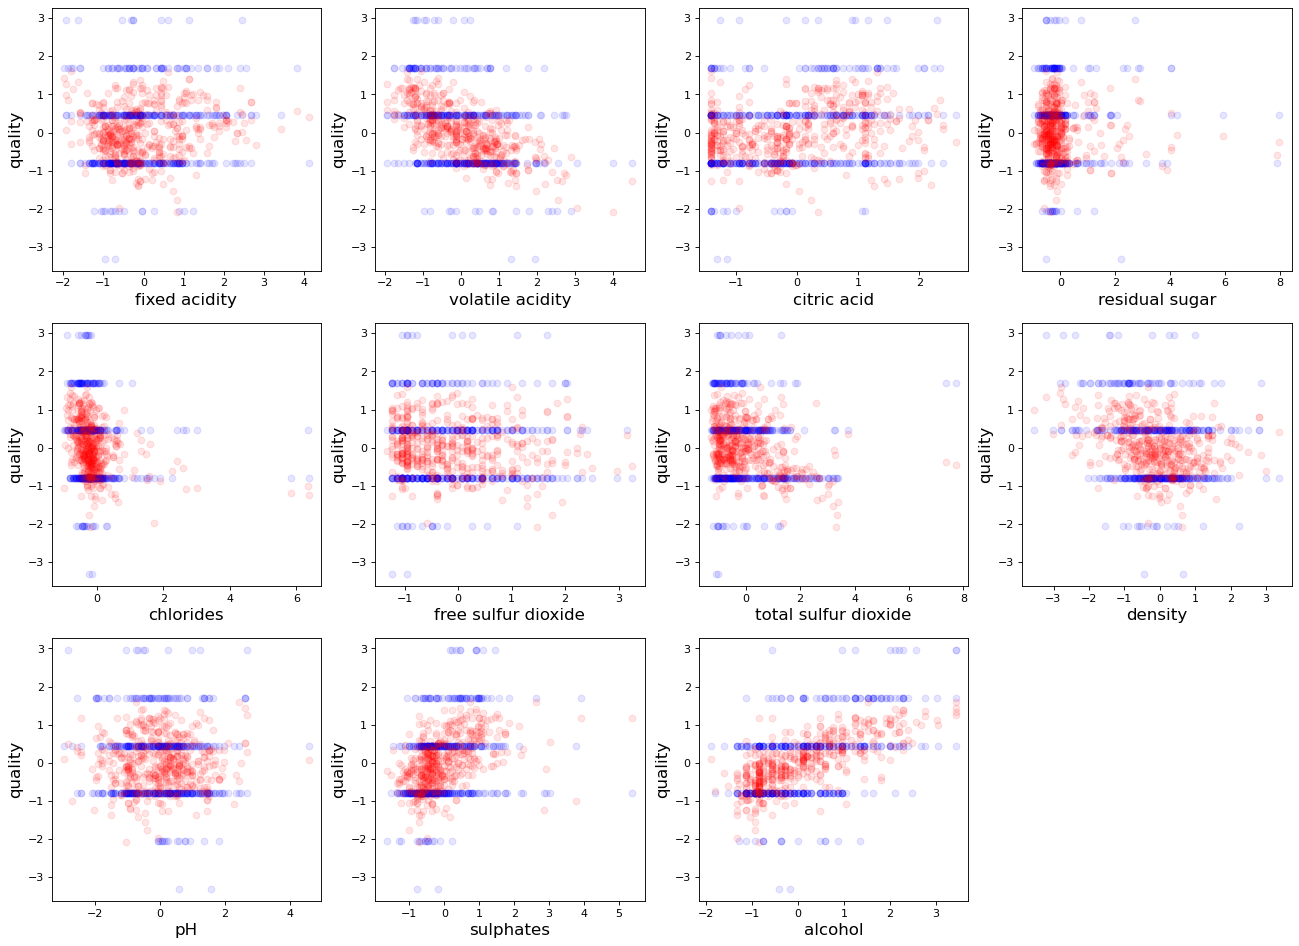

In [284]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for i in range(1,12):
    xlabel = labels[i-1]
    plt.subplot(4, 4, i)
    # plt.scatter(X_train_normal[i-1,:], Y_train_normal,alpha=0.1)
    # plt.scatter(X_train_normal[i-1,:], Y_pred_train,c='red',alpha=0.1)
    
    plt.scatter(X_test_normal_transp[i-1,:], Y_test_normal,c='blue',alpha=0.1)
    plt.scatter(X_test_normal_transp[i-1,:], Y_pest_train,c='red',alpha=0.1)

    plt.ylabel('quality', fontsize=15)
    plt.xlabel(str(xlabel), fontsize=15)
plt.show()

In [285]:
linear_regressor.coef_

array([-0.00334691, -0.30349697, -0.08864764,  0.0015453 , -0.14462044,
        0.0833643 , -0.19288915,  0.03046118, -0.08408778,  0.21289668,
        0.34923071])

## Gaussian (RBF) Kernel

In [286]:
from sklearn.kernel_ridge import KernelRidge

In [288]:
%%time
# range of values to try 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(-2, 5, K_sgm)
lmbd = np.linspace(-5, 2, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

    KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

    for j in range(K_lmbd): 
        KRR_CV.alpha = (2**lmbd[j])
        this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

        scores[i,j] = (np.mean(this_score))
        scores_std[i,j] = (np.std(this_score))

CPU times: user 1min 58s, sys: 1min 18s, total: 3min 17s
Wall time: 29.4 s


In [289]:
ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()
print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])

sgm_rbf_fine= sgm[ij_max[0]]
lmb_rbf_fine = lmbd[ij_max[1]]

log_2 sg: 1.8888888888888888 log_2_lmbd:  -2.6666666666666665


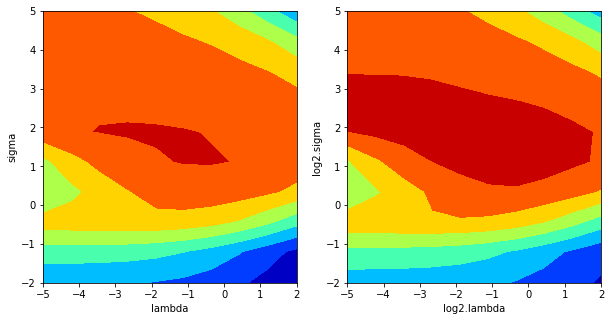

In [298]:
lv, sv = np.meshgrid(lmbd, sgm)

plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1, 2, 1)
plt.contourf( lv, sv, np.abs(scores),cmap='jet_r')
plt.xlabel('lambda')
plt.ylabel('sigma')

plt.subplot(1, 2, 2)
plt.contourf( lv, sv, np.log2(np.abs(scores)),cmap='jet_r')
plt.xlabel('log2.lambda')
plt.ylabel('log2.sigma')
plt.show()

In [299]:
alpha_new_rbf = 2**lmb_rbf_fine
gamma_new_rbf = 1/(2*(2**sgm_rbf_fine)**2)

print(alpha_new_rbf)
print(gamma_new_rbf)

0.15749013123685915
0.03645403248675365


In [301]:
gaussian_krr = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha = alpha_new_rbf, gamma=gamma_new_rbf)

gaussian_krr.fit(X_train_normal, Y_train_normal)
RBF_Y_train_predict = gaussian_krr.predict(X_train_normal)
RBF_Y_test_predict = gaussian_krr.predict(X_test_normal)
# RBF_Y_new_predict = gaussian_krr.predict(X_new_normal)

MSE_train = calculate_MSE(RBF_Y_train_predict, Y_train_normal)
MSE_test = calculate_MSE(RBF_Y_test_predict, Y_test_normal)

print(MSE_train)
print(MSE_test)

0.4439925099697863
0.6776020107428307


## Laplacian Kernel

In [302]:
%%time
# range of values to try 
K_sgm = 40
K_lmbd = 40

# sgm = np.linspace(0, 7.5, K_sgm)
# lmbd = np.linspace(-10, 4, K_lmbd)

sgm = np.linspace(-10, 10, K_sgm)
lmbd = np.linspace(-10, 10, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

    KRR_CV.gamma = 1/((2**sgm[i]))

    for j in range(K_lmbd): 
        KRR_CV.alpha = (2**lmbd[j])
        this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

        scores[i,j] = (np.mean(this_score))
        scores_std[i,j] = (np.std(this_score))

CPU times: user 32min 8s, sys: 22min 26s, total: 54min 35s
Wall time: 7min 54s


In [303]:
ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()
print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])

sgm_laplacian_fine= sgm[ij_max[0]]
lmb_laplacian_fine = lmbd[ij_max[1]]

log_2 sg: 1.7948717948717938 log_2_lmbd:  -2.3076923076923084


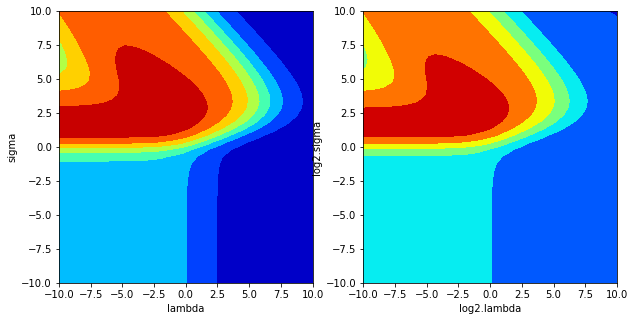

In [305]:
lv, sv = np.meshgrid(lmbd, sgm)

plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1, 2, 1)
plt.contourf( lv, sv, np.abs(scores), cmap='jet_r')
plt.xlabel('lambda')
plt.ylabel('sigma')

plt.subplot(1, 2, 2)
plt.contourf( lv, sv, np.log2(np.abs(scores)),cmap='jet_r')
plt.xlabel('log2.lambda')
plt.ylabel('log2.sigma')
plt.show()

In [306]:
alpha_new_lap = 2**lmb_laplacian_fine
gamma_new_lap = 1/((2**sgm_laplacian_fine))

print(alpha_new_lap)
print(gamma_new_lap)

0.20198326800364308
0.28819719621231726


In [309]:
laplacian_krr = skl.kernel_ridge.KernelRidge(kernel='laplacian', alpha = alpha_new_lap, gamma=gamma_new_lap)

laplacian_krr.fit(X_train_normal, Y_train_normal)
RBF_Y_train_predict = laplacian_krr.predict(X_train_normal)
RBF_Y_test_predict = laplacian_krr.predict(X_test_normal)

MSE_train = calculate_MSE(RBF_Y_train_predict, Y_train_normal)
MSE_test = calculate_MSE(RBF_Y_test_predict, Y_test_normal)

print(MSE_train)
print(MSE_test)

0.03697026141671721
0.6049612990471498


In [310]:
#  ------------------ Notes from office hours
# linear regression --> fit it --> coefficients
# linear.regression.fit -->coeffs

# To do:
- Use 10-fold CV to tune the length scale 𝜎 and the regularization parameter 𝜆 for each of the above kernels. Report your choices of the optimal values of 𝜎, 𝜆 and provide a clear explanation of why and how you picked those values. Keep in mind that you won’t be able to report the “true” optimal values here. We are looking for an informed/good choice given your computational budget.

- Provide a table reporting the training and test mean squared errors (MSEs) of all three models: linear regression, and Gaussian and Laplacian kernels with the optimal hyperparameters found via CV. Discuss your findings.

- Use your three models to predict the quality of the new batch of wines and report the output of each model on the 0-10 scale.

In [313]:
KRR_rbf = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha = alpha_new_rbf, gamma=gamma_new_rbf)
KRR_lap = skl.kernel_ridge.KernelRidge(kernel='laplacian', alpha = alpha_new_lap, gamma=gamma_new_lap)

KRR_rbf.fit(X_train_normal, Y_train_normal)
KRR_rbf_train_pred = KRR_rbf.predict(X_train_normal)
KRR_rbf_test_pred = KRR_rbf.predict(X_test_normal)
KRR_rbf_new_pred = KRR_rbf.predict(X_new_normal)

rbf_train_mse = calculate_MSE(Y_train_normal, KRR_rbf_train_pred)
rbf_test_mse = calculate_MSE(Y_test_normal, KRR_rbf_test_pred)

KRR_lap.fit(X_train_normal, Y_train_normal)
KRR_lap_train_pred = KRR_lap.predict(X_train_normal)
KRR_lap_test_pred = KRR_lap.predict(X_test_normal)
KRR_lap_new_pred = KRR_lap.predict(X_new_normal)

lap_train_mse = calculate_MSE(Y_train_normal, KRR_lap_train_pred)
lap_test_mse = calculate_MSE(Y_test_normal, KRR_lap_test_pred)

print(rbf_train_mse, rbf_test_mse, lap_train_mse, lap_test_mse)

0.4439925099697863 0.6776020107428307 0.03697026141671721 0.6049612990471498


In [314]:
Y_new_test = linear_regressor.predict(X_new_normal)  # make predictions with new
Y_new_test_denormed = (Y_new_test*Y_train_std)+Y_train_mean
print('predicted Y labels - linear regression:             ',Y_new_test_denormed)

rbf_new_Y_predicted = (KRR_rbf_new_pred*Y_train_std)+Y_train_mean
print('predicted Y labels - rbf:                           ',rbf_new_Y_predicted)

laplacian_new_Y_predicted = (KRR_lap_new_pred*Y_train_std)+Y_train_mean
print('predicted Y labels - laplacian:                     ',laplacian_new_Y_predicted)

predicted Y labels - linear regression:              [6.00469789 5.28767761 5.56363072 6.067022   5.94248207]
predicted Y labels - rbf:                            [5.98819145 5.47738478 5.35521093 6.16319512 6.08153557]
predicted Y labels - laplacian:                      [5.9922528  5.52350456 5.61455372 5.89899966 5.94103311]


In [317]:
%%time
# trying GridSearchCV

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(KernelRidge(kernel='rbf'), param_grid={'alpha':2**np.linspace(-4,4,20), "gamma": 1/(2*(2**np.linspace(-4,4,20))**2)})
cv.fit(X_train_normal, Y_train_normal)
print(cv.best_params_)

{'alpha': 0.4820879989712475, 'gamma': 0.06482219027788706}
CPU times: user 3min 28s, sys: 2min 24s, total: 5min 53s
Wall time: 48.6 s


In [318]:
print(alpha_new_rbf)
print(gamma_new_rbf)

0.15749013123685915
0.03645403248675365


In [319]:
gaussian_krr = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha = 0.4820879989712475, gamma=0.06482219027788706) # works slightly better.

gaussian_krr.fit(X_train_normal, Y_train_normal)
RBF_Y_train_predict = gaussian_krr.predict(X_train_normal)
RBF_Y_test_predict = gaussian_krr.predict(X_test_normal)
# RBF_Y_new_predict = gaussian_krr.predict(X_new_normal)

MSE_train = calculate_MSE(RBF_Y_train_predict, Y_train_normal)
MSE_test = calculate_MSE(RBF_Y_test_predict, Y_test_normal)

print(MSE_train)
print(MSE_test)

0.43804154613816276
0.6665889132279776
